In [1]:
import platform
print('python: '+platform.python_version())
import numpy as np
print('numpy: '+np.__version__)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
import pandas as pd
print('pandas: '+ pd.__version__)
import keras
print('keras: '+keras.__version__)

python: 3.9.12
numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.4.2
keras: 2.9.0


In [2]:
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout,SimpleRNN,BatchNormalization,LSTM,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers, models
from keras.models import Sequential 
from keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
import sys
import pylab
import itertools
import sklearn
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Cargar los datasets

In [3]:
Datrain1=np.load('Datatrain.npy')
Datest1=np.load('Datatest.npy')
labeltr=np.load('labeltr.npy')
labelte=np.load('labelte.npy')

In [4]:
print(Datrain1.shape)
print(Datest1.shape)

(30000, 40, 40)
(10000, 40, 40)


In [5]:
Datrain=Datrain1/np.max(Datrain1)

In [6]:
Datest=Datest1/np.max(Datest1)

np.set_printoptions(threshold=np.inf)

Arquitectura

In [7]:
model = Sequential()
model.add(Conv2D(8, (4, 4), input_shape=(40, 40,1)))

model.add(Conv2D(8, (4, 4),activation='ReLU'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (4, 4),activation='ReLU'))
model.add(Flatten())
model.add(Dense(64, activation='ReLU'))
model.add(Dense(64, activation='ReLU'))
model.add(Dense(64, activation='ReLU'))
model.add(Dense(1, activation='sigmoid'))
  
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 37, 37, 8)         136       
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 8)         1032      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         1032      
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                100416    
                                                        

opt = keras.optimizers.Adam(learning_rate=0.0001)

In [8]:
model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Entrenar la CNN

In [9]:
history = model.fit(Datrain, labeltr, batch_size = 20, epochs = 12,shuffle=True)

Epoch 1/12
1500/1500 [==============================] - 30s 19ms/step - loss: 0.4508 - accuracy: 0.7873
Epoch 2/12
1500/1500 [==============================] - 29s 20ms/step - loss: 0.3913 - accuracy: 0.8299
Epoch 3/12
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3811 - accuracy: 0.8353
Epoch 4/12
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3771 - accuracy: 0.8382
Epoch 5/12
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3718 - accuracy: 0.8416
Epoch 6/12
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3701 - accuracy: 0.8427
Epoch 7/12
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3670 - accuracy: 0.8430
Epoch 8/12
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3664 - accuracy: 0.8436
Epoch 9/12
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3626 - accuracy: 0.8447
Epoch 10/12
1500/1500 [==============================] - 28s 18m

In [10]:
predictionL=model.predict(x=Datest) #, batch_size=10,verbose=0,)

predictionL = np.around(predictionL) 

313/313 [==============================] - 3s 8ms/step


In [11]:
print(predictionL)
print(labelte)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[0 0 0 ... 1 1 1]


In [12]:
test_loss, test_acc = model.evaluate(Datest, labelte, batch_size=32)
print('Acurracy ', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.3755 - accuracy: 0.8455
Acurracy  0.8454999923706055


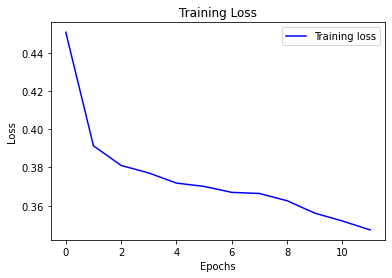

In [13]:
loss = history.history['loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title("Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Matriz de confusión

Confusion matrix, without normalization
[[3988 1032]
 [ 513 4467]]


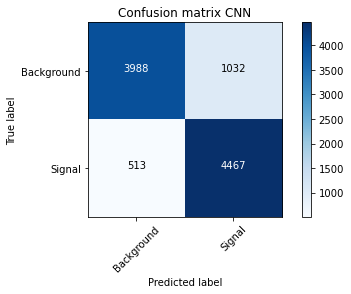

In [14]:
cm=confusion_matrix(y_true=labelte,y_pred=predictionL)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_labels=['Background', 'Signal']    
plot_confusion_matrix(cm=cm,classes=cm_labels,title='Confusion matrix CNN')

In [15]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
model = Sequential()
model.add(Conv2D(128, (4, 4), input_shape=(40, 40,1)))
model.add(Conv2D(64, (4, 4),activation='relu', padding='valid'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4, 4),activation='relu', padding='valid'))
model.add(Conv2D(64, (4, 4),activation='relu', padding='valid'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
  
model.summary() 

In [ ]:
model.compile(optimizer='adam',
               loss='mse',
               metrics=['accuracy'])

In [ ]:
history = model.fit(Datrain, labeltr, batch_size = 10, epochs = 10)

In [ ]:
predictionL=model.predict(x=Datest, batch_size=10,verbose=0)

predictionL = np.around(predictionL) 

In [ ]:
print(predictionL)
print(labelte)

In [ ]:
test_loss, test_acc = model.evaluate(Datest, labelte)
print('Acurracy ', test_acc)

In [ ]:
cm=confusion_matrix(y_true=labelte,y_pred=predictionL)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_labels=['Background', 'Signal (top quark)']    
plot_confusion_matrix(cm=cm,classes=cm_labels,title='Matriz de confusion')